In [1]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [4]:
# Load the dataset
df = pd.read_csv('pima_indians_diabetes.csv')

# Check the first five samples
print(df.head())

# Check for any categorical features
print(df.dtypes)

# Check if the problem is classification or regression
print("Output variable unique values:", df['class'].unique())

   time_pregnant_no  plasma_concentration  diastolic_blood_pressure  \
0                 6                   148                        72   
1                 1                    85                        66   
2                 8                   183                        64   
3                 1                    89                        66   
4                 0                   137                        40   

   triceps_skinfold_thickness  serum_insulin   bmi  diabetes_pedigree  age  \
0                          35              0  33.6              0.627   50   
1                          29              0  26.6              0.351   31   
2                           0              0  23.3              0.672   32   
3                          23             94  28.1              0.167   21   
4                          35            168  43.1              2.288   33   

   class  
0      1  
1      0  
2      1  
3      0  
4      1  
time_pregnant_no                int64


## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [5]:
X = df.drop('class', axis=1)
y = df['class']

In [6]:
# Define the preprocessing steps
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Replace missing values with the mean of each column
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

In [7]:
# Define the full pipeline: preprocessing + RandomForest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_pipeline.predict(X_test)

In [9]:
# Get feature importances from the random forest model
importances = rf_pipeline.named_steps['classifier'].feature_importances_
features = X.columns

# Combine importances and features into a DataFrame for easier handling
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
print(importance_df)

                      Feature  Importance
0            time_pregnant_no    0.080552
1        plasma_concentration    0.282089
2    diastolic_blood_pressure    0.084052
3  triceps_skinfold_thickness    0.070559
4               serum_insulin    0.069385
5                         bmi    0.158120
6           diabetes_pedigree    0.113127
7                         age    0.142116


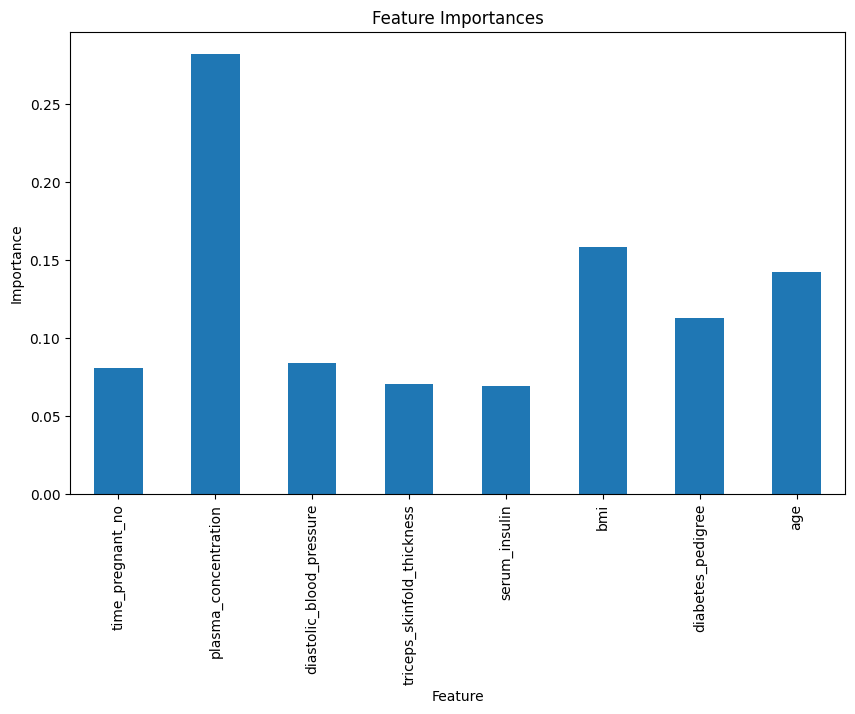

In [10]:
importance_df.set_index('Feature').plot(kind='bar', legend=False)
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

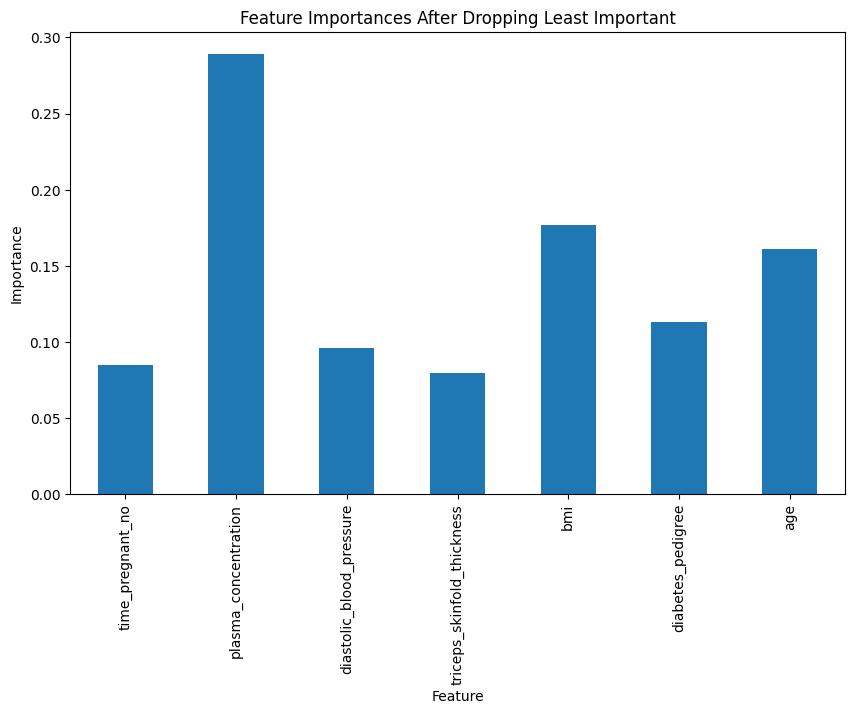

In [11]:
# Identify the least important feature
least_important_feature = importance_df.sort_values(by='Importance').iloc[0]['Feature']

# Drop the least important feature from X
X_dropped = X.drop(least_important_feature, axis=1)

# Repeat the modeling process
X_train, X_test, y_train, y_test = train_test_split(X_dropped, y, test_size=0.3, random_state=42)

# Re-fit the pipeline with the dropped feature
rf_pipeline.fit(X_train, y_train)

# Make new predictions
new_predictions = rf_pipeline.predict(X_test)

# Re-calculate feature importances
new_importances = rf_pipeline.named_steps['classifier'].feature_importances_
new_features = X_dropped.columns

# Plot new importances
new_importance_df = pd.DataFrame({'Feature': new_features, 'Importance': new_importances})
new_importance_df.set_index('Feature').plot(kind='bar', legend=False)
plt.title('Feature Importances After Dropping Least Important')
plt.ylabel('Importance')
plt.show()